In [1]:
from datasets import load_dataset

# source: https://huggingface.co/datasets/ucberkeley-dlab/measuring-hate-speech
dataset1 = load_dataset("ucberkeley-dlab/measuring-hate-speech")

print(f"Number of Columns: {dataset1['train'].num_columns}")
print(f"Number of Rows: {dataset1['train'].num_rows}")

Found cached dataset parquet (/Users/ngocle/.cache/huggingface/datasets/ucberkeley-dlab___parquet/ucberkeley-dlab--measuring-hate-speech-c32713cabe528196/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

Number of Columns: 131
Number of Rows: 135556


In [2]:
# Rename features
dataset1['train'] = dataset1['train'].rename_column("sentiment", "pos/neg sentiment")
dataset1['train'] = dataset1['train'].rename_column("respect", "(dis)respect")
dataset1['train'] = dataset1['train'].rename_column("status", "inf/sup status")
dataset1['train'] = dataset1['train'].rename_column("hatespeech", "bias motivated language")
dataset1['train'] = dataset1['train'].rename_column("hate_speech_score", "hate speech")


- sentinment: positive (0) or negative sentiment (4)
- respect: respectful (0) or disrespectful (4)
- status: superior (0) or inferior status (4)
- hate speech: bias motive language
- hate_speech_score: hate speech

In [3]:
df1 = dataset1['train'].select(range(5)).to_pandas()
df1.head()

,comment_id,annotator_id,platform,pos/neg sentiment,(dis)respect,insult,humiliate,inf/sup status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False


In [4]:
# Clean Target Labels
# keep only text and specific targets
column1 = dataset1['train'].column_names
column2 = ['text', 'pos/neg sentiment', '(dis)respect', 'insult', 'humiliate',
           'inf/sup status', 'dehumanize', 'violence', 'genocide',
           'attack_defend',"bias motivated language", 'hate speech']
remove_columns = set(column1)-set(column2)

dataset2 = dataset1.remove_columns(remove_columns)
dataset2

DatasetDict({
    train: Dataset({
        features: ['pos/neg sentiment', '(dis)respect', 'insult', 'humiliate', 'inf/sup status', 'dehumanize', 'violence', 'genocide', 'attack_defend', 'bias motivated language', 'hate speech', 'text'],
        num_rows: 135556
    })
})

In [5]:
df2 = dataset2['train'].select(range(135556)).to_pandas()
df2.head()

,pos/neg sentiment,(dis)respect,insult,humiliate,inf/sup status,dehumanize,violence,genocide,attack_defend,bias motivated language,hate speech,text
0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-3.90,Yes indeed. She sort of reminds me of the elde...
1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,-6.52,The trans women reading this tweet right now i...
2,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,4.0,2.0,0.36,Question: These 4 broads who criticize America...
3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.26,It is about time for all illegals to go back t...
4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,3.0,2.0,1.54,For starters bend over the one in pink and kic...


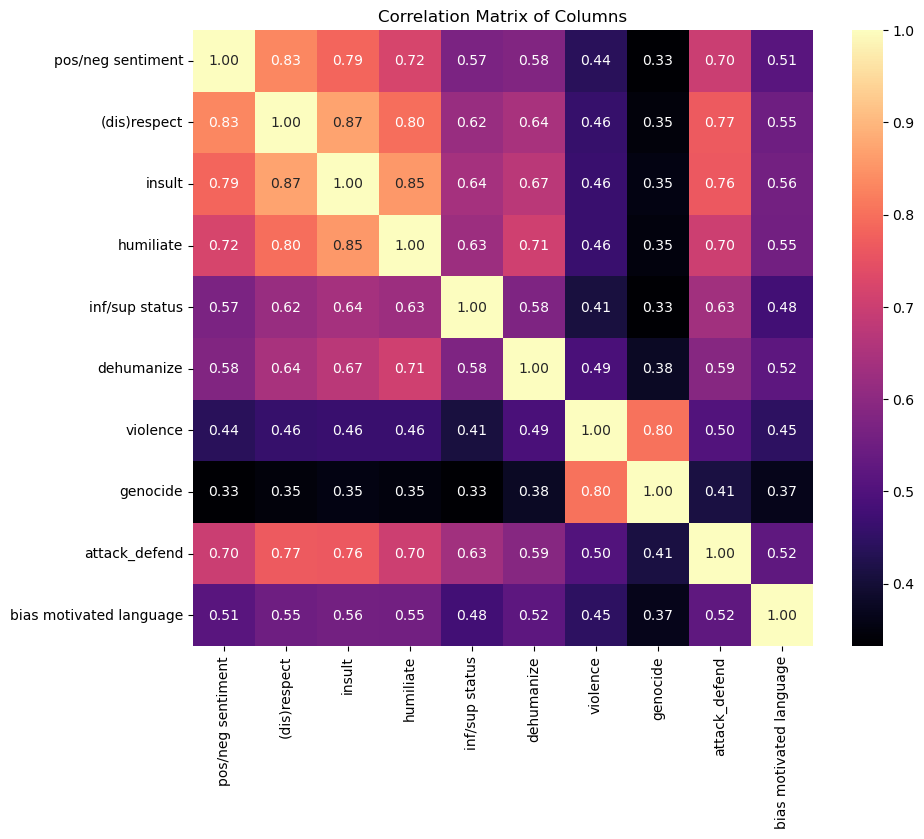

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Exclude the 'text' column and calculate the correlation matrix
correlation_matrix = df2.drop(['text','hate speech'], axis=1).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Matrix of Columns')
plt.show()


In [7]:
df2.describe()

,pos/neg sentiment,(dis)respect,insult,humiliate,inf/sup status,dehumanize,violence,genocide,attack_defend,bias motivated language,hate speech
count,135556.000000,135556.000000,135556.00000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000
mean,2.954307,2.828875,2.56331,2.278638,2.698575,1.846211,1.052045,0.678413,2.625992,0.744733,-0.567428
std,1.231552,1.309548,1.38983,1.370876,0.898500,1.402372,1.345706,1.179598,1.114960,0.932260,2.380003
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.340000
25%,2.000000,2.000000,2.00000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,-2.330000
50%,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,0.000000,0.000000,3.000000,0.000000,-0.340000
75%,4.000000,4.000000,4.00000,3.000000,3.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.410000
max,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,6.300000


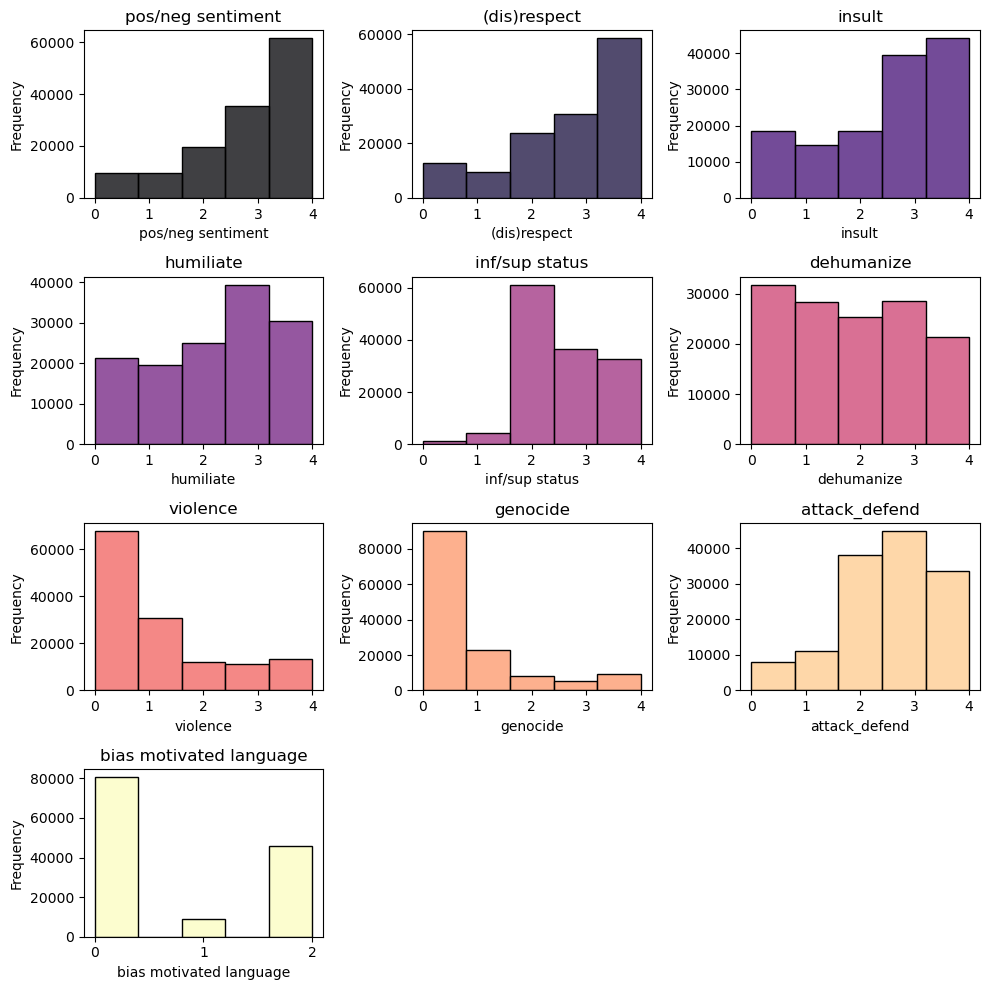

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Selecting columns to plot (all except 'text')
columns_to_plot = [col for col in df2.columns if col not in ['text', 'hate speech']][:12]


# Define colors from the magma colormap
colors = [cm.magma(i) for i in np.linspace(0, 1, len(columns_to_plot))]

# Plotting histograms with Seaborn and optimized space
plt.figure(figsize=(10, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)  # Adjust the subplot layout as needed
    # Choose a color from the defined colors based on the position of the subplot
    color = colors[(i-1)]  # Integer division to get the color index
    sns.histplot(df2[column], bins=5, kde=False, color=color)  
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Set x-axis to show only integer values
    plt.xticks(range(int(df2[column].min()), int(df2[column].max()) + 1))

plt.tight_layout()
plt.show()


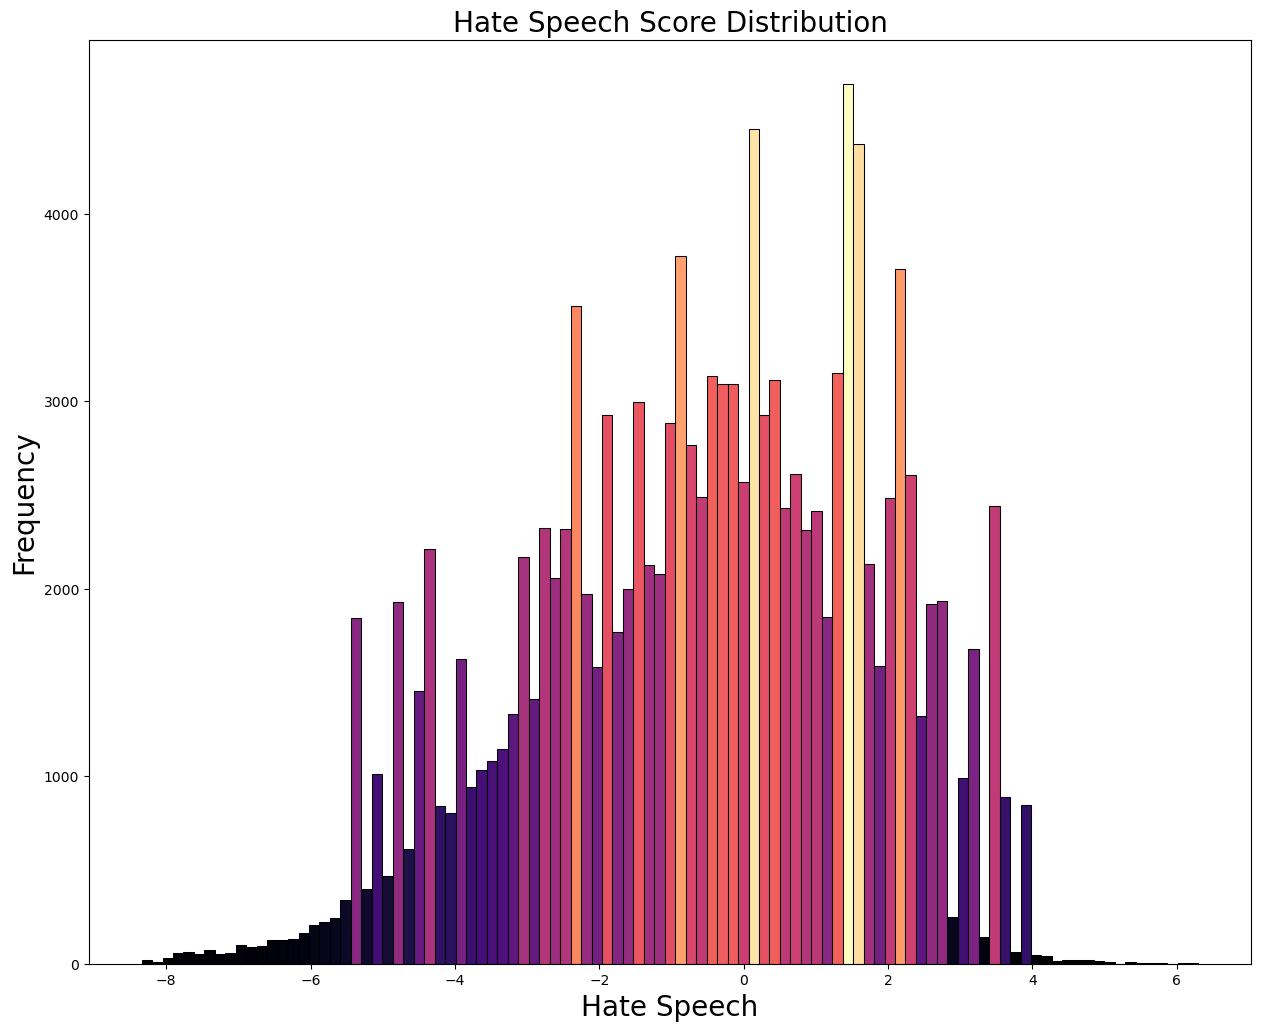

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Create histogram
plt.figure(figsize=(15, 12))
ax = sns.histplot(df2['hate speech'], kde=False, color='darkred')  # Adjust bins as needed

# Get the patches used to create the histogram
patches = ax.patches

# Setting color based on the height of the patch
norm = colors.Normalize(vmin=min([p.get_height() for p in patches]), vmax=max([p.get_height() for p in patches]))
colormap = plt.cm.magma

for patch in patches:
    height = patch.get_height()
    patch.set_facecolor(colormap(norm(height)))
    #patch.set_edgecolor('none')

plt.title('Hate Speech Score Distribution', fontsize=20)
plt.xlabel('Hate Speech', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

plt.show()


In [10]:
from datasets import Dataset

def bin_values(column, value):
    if column == 'bias motivated language':
        if value == 0:
            return False
        elif value == 1 or value ==2:
            return True
        else:
            return None
    elif column == 'hate speech':
        if value <= 0:
            return False
        else:
            return True
    else:
        if 0 <= value <= 2:
            return False
        elif 3 <= value <= 4:
            return True
        else:
            return None  

def apply_binning(example):
    for key, value in example.items():
        if key != 'text':
            example[key] = bin_values(key, value)
    return example

# Apply the function to the 'train' split of the dataset
dataset2['train'] = dataset2['train'].map(apply_binning)


Map:   0%|          | 0/135556 [00:00<?, ? examples/s]

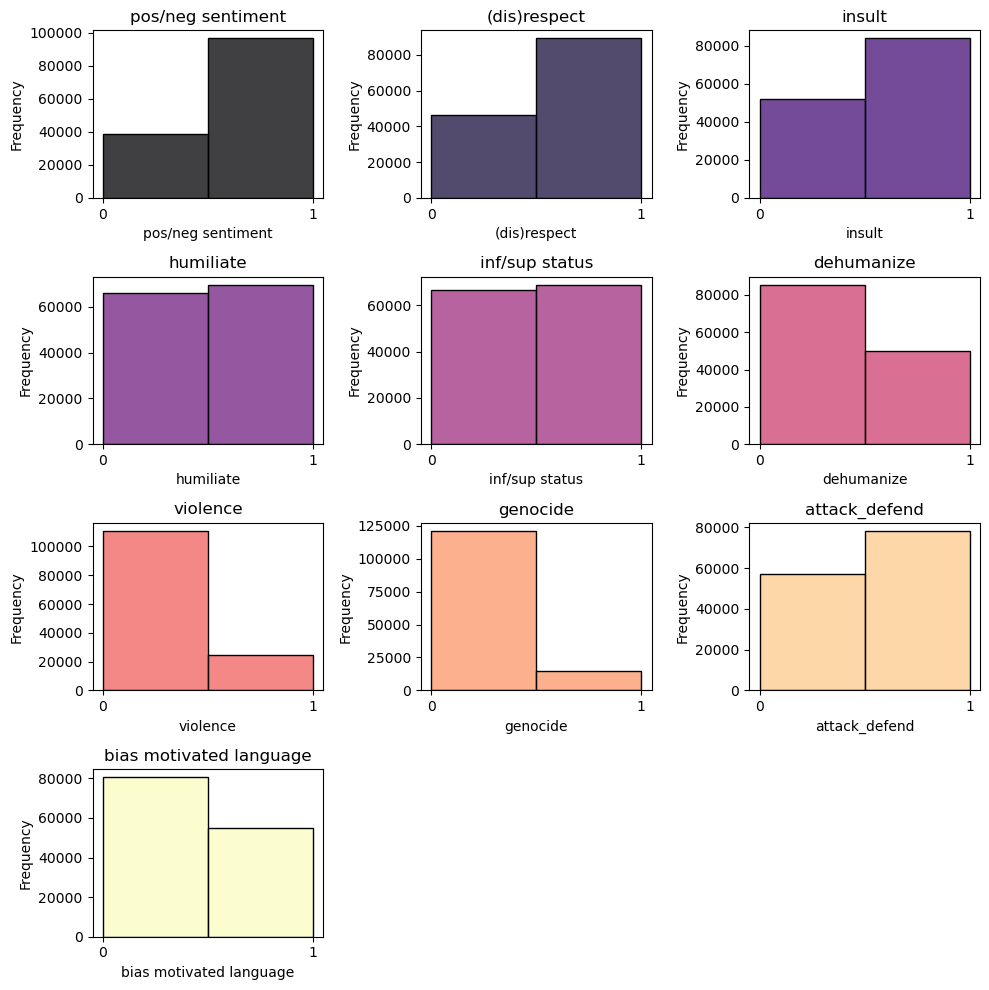

In [11]:
from datasets import Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Convert the 'train' split of dataset2 to a pandas DataFrame
df2 = dataset2['train'].to_pandas()

# Selecting columns to plot (all except 'text' and 'hate_speech')
columns_to_plot = [col for col in df2.columns if col not in ['text','hate speech']][:10]

# Define colors from the magma colormap
colors = [cm.magma(i) for i in np.linspace(0, 1, len(columns_to_plot))]

# Plotting histograms with Seaborn and optimized space
plt.figure(figsize=(10, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)  # Adjust the subplot layout as needed
    # Choose a color from the defined colors based on the position of the subplot
    color = colors[i - 1]  # Index to get the color
    sns.histplot(df2[column], bins=2, kde=False, color=color)  # bins set to 2 for True/False
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Set x-axis to show only integer values
    plt.xticks([0, 1])  # Since it's boolean, we only want ticks at 0 (False) and 1 (True)

plt.tight_layout()
plt.show()


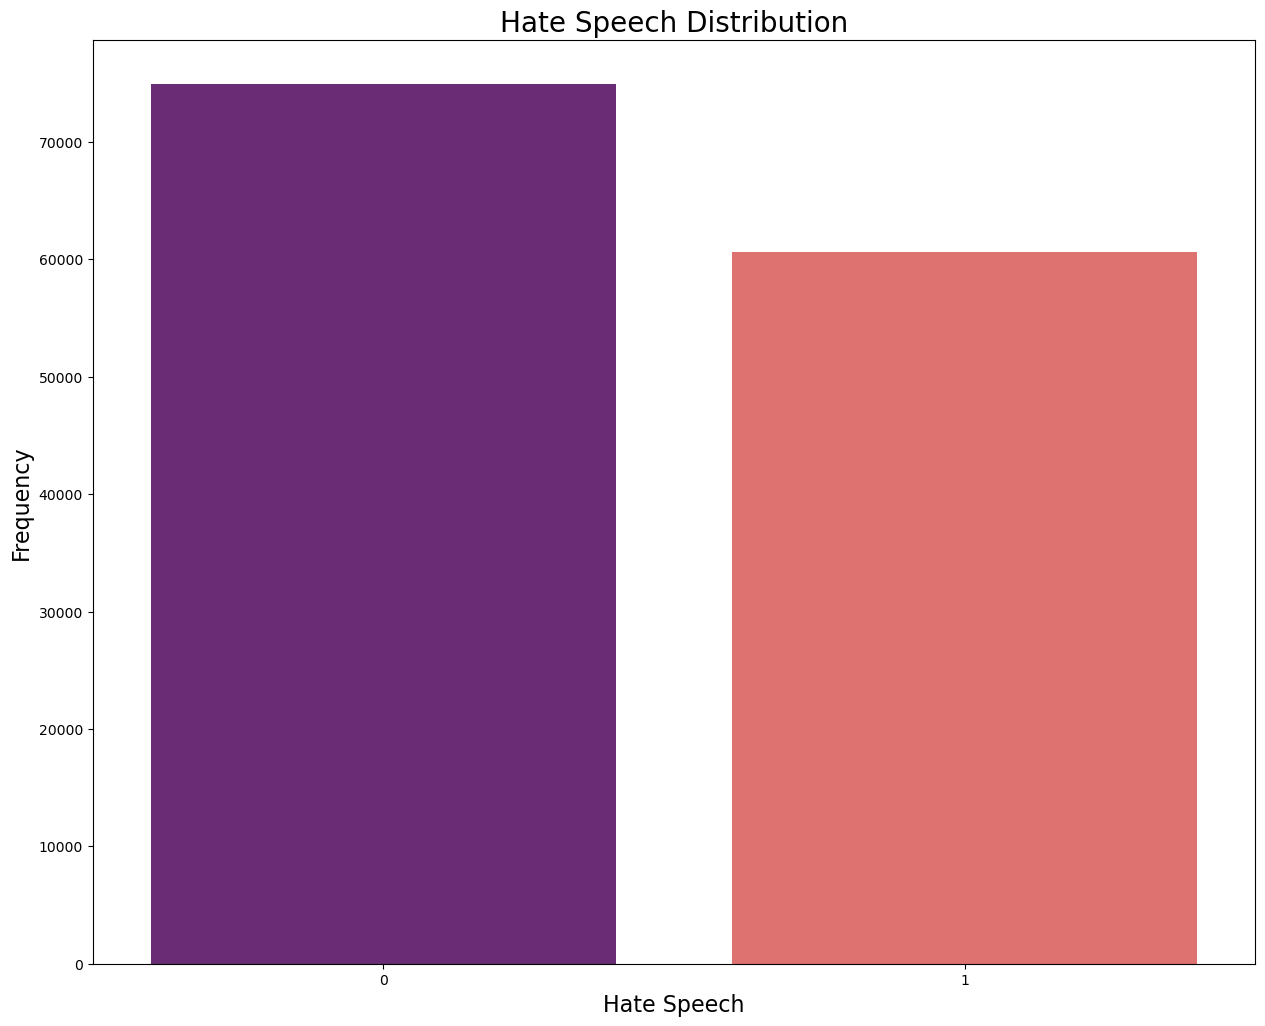

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame and 'hate speech' column is already binned according to your rules

# Plot the binned data
plt.figure(figsize=(15, 12))
ax = sns.countplot(x='hate speech', data=df2, palette='magma')
plt.title('Hate Speech Distribution', fontsize=20)
plt.xlabel('Hate Speech', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Customize x-axis labels if needed
ax.set_xticklabels([0, 1])

plt.show()


In [13]:
# get two-way label and label id
ID2LABEL = {}
LABEL2ID = {}

label_id = 0
for label in dataset2['train'].features.keys():
    if label in ['text']:
        continue
        
    ID2LABEL[label_id] = label
    LABEL2ID[label] = label_id
    
    label_id += 1
    
print(f"ID2LABEL:\n{ID2LABEL}\n")
print(f"LABEL2ID:\n{LABEL2ID}")

ID2LABEL:
{0: 'pos/neg sentiment', 1: '(dis)respect', 2: 'insult', 3: 'humiliate', 4: 'inf/sup status', 5: 'dehumanize', 6: 'violence', 7: 'genocide', 8: 'attack_defend', 9: 'bias motivated language', 10: 'hate speech'}

LABEL2ID:
{'pos/neg sentiment': 0, '(dis)respect': 1, 'insult': 2, 'humiliate': 3, 'inf/sup status': 4, 'dehumanize': 5, 'violence': 6, 'genocide': 7, 'attack_defend': 8, 'bias motivated language': 9, 'hate speech': 10}


In [14]:
# get target label counts and percentages
label_counts = {}
label_percentages = {}

for label in LABEL2ID:
    label_counts[label] = sum(dataset2['train'][label])
    label_percentages[label] = float(f"{sum(dataset2['train'][label]) / len(dataset2['train'])*100:.2f}")

print(f"LABEL_COUNTS:\n{label_counts}\n")
print(f"LABEL_PERCENTAGES:\n{label_percentages}")

LABEL_COUNTS:
{'pos/neg sentiment': 96678.0, '(dis)respect': 89193.0, 'insult': 83826.0, 'humiliate': 69660.0, 'inf/sup status': 68913.0, 'dehumanize': 49975.0, 'violence': 24666.0, 'genocide': 14553.0, 'attack_defend': 78351.0, 'bias motivated language': 54932.0, 'hate speech': 60602.0}

LABEL_PERCENTAGES:
{'pos/neg sentiment': 71.32, '(dis)respect': 65.8, 'insult': 61.84, 'humiliate': 51.39, 'inf/sup status': 50.84, 'dehumanize': 36.87, 'violence': 18.2, 'genocide': 10.74, 'attack_defend': 57.8, 'bias motivated language': 40.52, 'hate speech': 44.71}


In [15]:
def create_labels(batch):
    # one-hot encode targets for training
    batch['labels'] = [[float(batch[label][i]) for label in LABEL2ID] for i in range(len(batch['text']))]
    return batch

dataset2 = dataset2.map(create_labels, batched=True, remove_columns=LABEL2ID.keys())
dataset2

Map:   0%|          | 0/135556 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 135556
    })
})

In [16]:
# Convert the 'train' split of dataset2 to a pandas DataFrame
df_train = dataset2['train'].to_pandas()

# Display the first few rows of the DataFrame
df_train.head()


,text,labels
0,Yes indeed. She sort of reminds me of the elde...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,The trans women reading this tweet right now i...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Question: These 4 broads who criticize America...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ..."
3,It is about time for all illegals to go back t...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
4,For starters bend over the one in pink and kic...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ..."


In [17]:
import numpy as np
import torch

# set seed for reproducibility
SEED = 183
torch.manual_seed(SEED)
np.random.seed(SEED)

In [18]:
from datasets import DatasetDict

# train (80%), validation (10%), test (10%) split
train_test_datasets = dataset2['train'].train_test_split(test_size=0.2, seed=SEED, 
                                                         shuffle=True)
validation_test_datasets = train_test_datasets['test'].train_test_split(test_size=0.5,
                                                                        seed=SEED, shuffle=True)

dataset2 = DatasetDict({
    'train': train_test_datasets['train'],
    'validation': validation_test_datasets['train'],
    'test': validation_test_datasets['test']
})
dataset2

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 108444
    })
    validation: Dataset({
        features: ['text', 'labels'],
        num_rows: 13556
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 13556
    })
})

# Tokenizing

In [19]:
from transformers import AutoTokenizer

CHECKPOINT = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(CHECKPOINT)
tokenized_datasets = dataset2.map(lambda batch: tokenizer(batch['text'], truncation=True), 
                                  batched=True, remove_columns=['text'])
tokenized_datasets

Map:   0%|          | 0/108444 [00:00<?, ? examples/s]

Map:   0%|          | 0/13556 [00:00<?, ? examples/s]

Map:   0%|          | 0/13556 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 108444
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 13556
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 13556
    })
})

# Dataloaders

In [20]:
from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader

# get data collator for data loader
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# setup dataloaders with tokenized dataset
# to shuffle only be train for each epoch
# in 64 batch sizes with dynamic padding

dataloaders = {}
for dataset_type in tokenized_datasets.keys():
    dataloaders[dataset_type] = DataLoader(
        dataset=tokenized_datasets[dataset_type],
        batch_size=64,
        shuffle=(dataset_type == 'train'), 
        collate_fn=data_collator,
    )

In [21]:
# get current device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

# Loading pre-trained model

In [22]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    CHECKPOINT,
    problem_type='multi_label_classification',
    num_labels=len(LABEL2ID),
    label2id=LABEL2ID,
    id2label=ID2LABEL,
)

# move model to device
model.to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.weight', 'pre_classifier.

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

# Optimizer & Scheduler

In [25]:
from transformers import AdamW, get_scheduler

# setup optimizer and scheduler
scheduler_name = 'cosine'
optimizer = AdamW(model.parameters(), lr=8e-5, weight_decay=0.1, 
                  no_deprecation_warning=True)
num_training_epochs = 3
num_training_steps = num_training_epochs * len(dataloaders['train'])
num_warmup_steps = 0

lr_scheduler = get_scheduler(
    name=scheduler_name,
    optimizer=optimizer,
    num_training_steps=num_training_steps,
    num_warmup_steps=num_warmup_steps,
)

print(f"           SCHEDULER NAME: {scheduler_name}")
print(f"                OPTIMIZER: {optimizer.__class__.__name__}")
print(f"NUMBER OF TRAINING EPOCHS: {num_training_epochs}")
print(f" NUMBER OF TRAINING STEPS: {num_training_steps}")

           SCHEDULER NAME: cosine
                OPTIMIZER: AdamW
NUMBER OF TRAINING EPOCHS: 3
 NUMBER OF TRAINING STEPS: 5085


# Training metrics

In [26]:
from sklearn.metrics import accuracy_score, f1_score

def samples_accuracy_score(y_true, y_pred):
    return np.sum(y_true==y_pred) / y_true.size

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = torch.nn.functional.sigmoid(torch.Tensor(logits))
    predictions = (predictions >= 0.50).int().numpy()
    samples_accuracy = samples_accuracy_score(labels, predictions)
    samples_f1 = f1_score(labels, predictions, average='samples', zero_division=0)
    return {
        'accuracy': samples_accuracy,
        'f1': samples_f1,
    }

# Training function 

In [27]:
from tqdm.notebook import tqdm

def train(model, dataloader):
    # setup train metrics
    loss = 0
    train_predictions = []
    train_labels = []
    
    # set to train mode
    model.train()
    # iterate through dataloader
    for batch in tqdm(dataloader):
        # zero the gradients
        optimizer.zero_grad()
        
        # predict batch in current device
        batch.to(device)
        outputs = model(**batch)
        
        # compute multilabel outputs
        predictions = torch.nn.functional.sigmoid(outputs.logits).cpu()
        predictions = (predictions >= 0.50).int().numpy()
        labels = batch['labels']
        
        # backprop and update learning rate
        outputs.loss.backward()
        optimizer.step()
        lr_scheduler.step()
        
        # accumulate train metrics
        loss += outputs.loss.item()
        train_predictions += predictions.tolist()
        train_labels += labels.tolist()
        
    # compute train metrics
    loss /= len(dataloader)
    samples_accuracy = samples_accuracy_score(np.array(train_labels), np.array(train_predictions))
    samples_f1 = f1_score(np.array(train_labels), np.array(train_predictions), average='samples', zero_division=0)
    return {
        'loss': loss,
        'accuracy': samples_accuracy,
        'f1': samples_f1,
    }

# Evaluation function

In [28]:
def evaluate(model, dataloader):
    # setup evaluation metrics variables
    loss = 0
    evaluate_predictions = []
    evaluate_labels = []
    
    # set to evaluation mode
    model.eval()
    with torch.no_grad():
        # iterate through dataloader
        for batch in tqdm(dataloader):
            # predict batch in current device
            batch.to(device)
            outputs = model(**batch)
            
            # compute multilabel outputs
            predictions = torch.nn.functional.sigmoid(outputs.logits).cpu()
            predictions = (predictions >= 0.50).cpu().numpy()
            labels = batch['labels']
            
            # accumulate evaluation metrics
            loss += outputs.loss.item()
            evaluate_predictions += predictions.tolist()
            evaluate_labels += labels.tolist()
            
    # compute evaluation metrics
    loss /= len(dataloader)
    samples_accuracy = samples_accuracy_score(np.array(evaluate_labels), np.array(evaluate_predictions))
    samples_f1 = f1_score(np.array(evaluate_labels), np.array(evaluate_predictions), average='samples', zero_division=0)
    return {
        'loss': loss,
        'accuracy': samples_accuracy,
        'f1': samples_f1,
    }

# Training 

In [29]:
for epoch in range(num_training_epochs):
    train_metrics = train(model, dataloaders['train'])
    validation_metrics = evaluate(model, dataloaders['validation'])
          
    print(f"EPOCH {epoch+1}", end=" | ")
    print(f"TRAIN LOSS: {train_metrics['loss']:.5f}", end=" | ")
    print(f"VALIDATION LOSS: {validation_metrics['loss']:.5f}", end=" | ")
    print(f"VALIDATION ACCURACY: {validation_metrics['accuracy']:.5f}", end=" | ")
    print(f"VALIDATION F1: {validation_metrics['f1']:.5f}")


  0%|          | 0/1695 [00:00<?, ?it/s]

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


  0%|          | 0/212 [00:00<?, ?it/s]

EPOCH 1 | TRAIN LOSS: 0.36714 | VALIDATION LOSS: 0.34533 | VALIDATION ACCURACY: 0.84156 | VALIDATION F1: 0.59067


  0%|          | 0/1695 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

EPOCH 2 | TRAIN LOSS: 0.31827 | VALIDATION LOSS: 0.33391 | VALIDATION ACCURACY: 0.84890 | VALIDATION F1: 0.57763


  0%|          | 0/1695 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

EPOCH 3 | TRAIN LOSS: 0.28751 | VALIDATION LOSS: 0.33839 | VALIDATION ACCURACY: 0.84871 | VALIDATION F1: 0.57390


# Fine-Tuned Metrics

In [30]:
test_metrics = evaluate(model, dataloaders['test'])
print(f"TEST ACCURACY: {test_metrics['accuracy']:.5f}", end=" | ")
print(f"TEST F1: {test_metrics['f1']:.5f}")

  0%|          | 0/212 [00:00<?, ?it/s]

TEST ACCURACY: 0.85057 | TEST F1: 0.57239


# Testing

In [31]:
import torch
from transformers import pipeline

# Check if CUDA is available and set the device
device = 0 if torch.cuda.is_available() else -1  # 0 for GPU, -1 for CPU

# Setup pipeline as a text classification with multilabel outputs
hate_speech_multilabel_classifier = pipeline(
    task='text-classification',
    model=model,
    tokenizer=tokenizer,
    device=device,  # Set the device here
    top_k=None
)


In [32]:
hate_text1 = """
You are ugly!
"""

hate_speech_multilabel_classifier(hate_text1)

[[{'label': 'pos/neg sentiment', 'score': 0.9744297862052917},
  {'label': '(dis)respect', 'score': 0.9558061957359314},
  {'label': 'insult', 'score': 0.9107742309570312},
  {'label': 'attack_defend', 'score': 0.8009464144706726},
  {'label': 'humiliate', 'score': 0.742354154586792},
  {'label': 'inf/sup status', 'score': 0.685844898223877},
  {'label': 'hate speech', 'score': 0.47107183933258057},
  {'label': 'dehumanize', 'score': 0.32840630412101746},
  {'label': 'bias motivated language', 'score': 0.2107309252023697},
  {'label': 'violence', 'score': 0.004291845951229334},
  {'label': 'genocide', 'score': 0.0005177556304261088}]]

In [33]:
hate_text2 = """
Jewish should be massacred. 
"""

hate_speech_multilabel_classifier(hate_text2)

[[{'label': 'hate speech', 'score': 0.9996540546417236},
  {'label': 'pos/neg sentiment', 'score': 0.99615877866745},
  {'label': '(dis)respect', 'score': 0.9956545829772949},
  {'label': 'attack_defend', 'score': 0.9948816299438477},
  {'label': 'insult', 'score': 0.9775776863098145},
  {'label': 'violence', 'score': 0.9580846428871155},
  {'label': 'genocide', 'score': 0.9287934303283691},
  {'label': 'inf/sup status', 'score': 0.8888633847236633},
  {'label': 'humiliate', 'score': 0.8577567338943481},
  {'label': 'bias motivated language', 'score': 0.673719048500061},
  {'label': 'dehumanize', 'score': 0.6650667786598206}]]

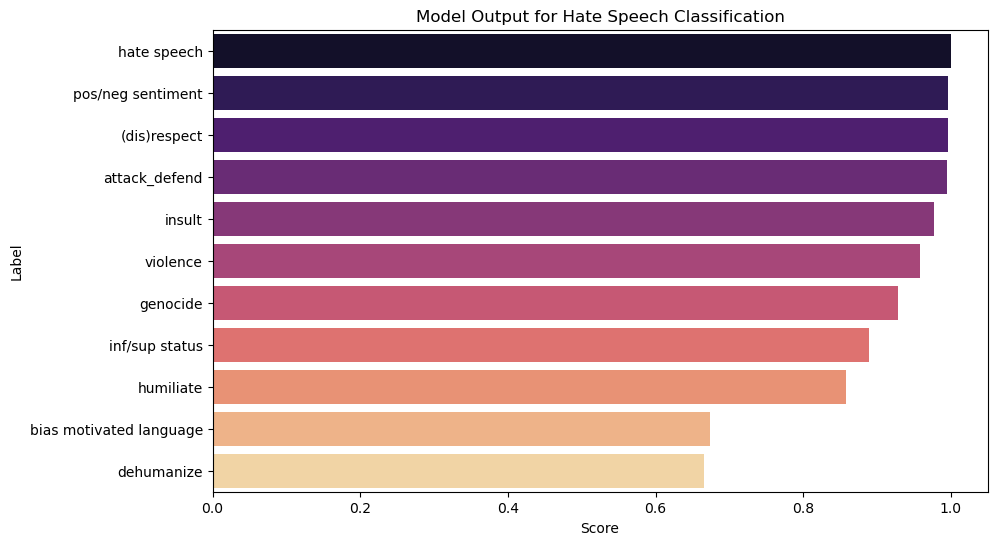

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example output from your model
output = [{'label': 'hate speech', 'score': 0.9996540546417236},
  {'label': 'pos/neg sentiment', 'score': 0.99615877866745},
  {'label': '(dis)respect', 'score': 0.9956545829772949},
  {'label': 'attack_defend', 'score': 0.9948816299438477},
  {'label': 'insult', 'score': 0.9775776863098145},
  {'label': 'violence', 'score': 0.9580846428871155},
  {'label': 'genocide', 'score': 0.9287934303283691},
  {'label': 'inf/sup status', 'score': 0.8888633847236633},
  {'label': 'humiliate', 'score': 0.8577567338943481},
  {'label': 'bias motivated language', 'score': 0.673719048500061},
  {'label': 'dehumanize', 'score': 0.6650667786598206}]

# Convert output to DataFrame
import pandas as pd
df3 = pd.DataFrame(output)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='label', data=df3, palette='magma')
plt.title('Model Output for Hate Speech Classification')
plt.xlabel('Score')
plt.ylabel('Label')
plt.show()


In [66]:
hate_text2a = """
Jewish should be looked down. 
"""

hate_speech_multilabel_classifier(hate_text2a)

[[{'label': 'pos/neg sentiment', 'score': 0.875056803226471},
  {'label': '(dis)respect', 'score': 0.8088425397872925},
  {'label': 'insult', 'score': 0.6814374327659607},
  {'label': 'attack_defend', 'score': 0.6645259857177734},
  {'label': 'inf/sup status', 'score': 0.5505391955375671},
  {'label': 'humiliate', 'score': 0.46543481945991516},
  {'label': 'bias motivated language', 'score': 0.31636956334114075},
  {'label': 'dehumanize', 'score': 0.3020295202732086},
  {'label': 'violence', 'score': 0.26002922654151917},
  {'label': 'hate speech', 'score': 0.20921409130096436},
  {'label': 'genocide', 'score': 0.09173750877380371}]]

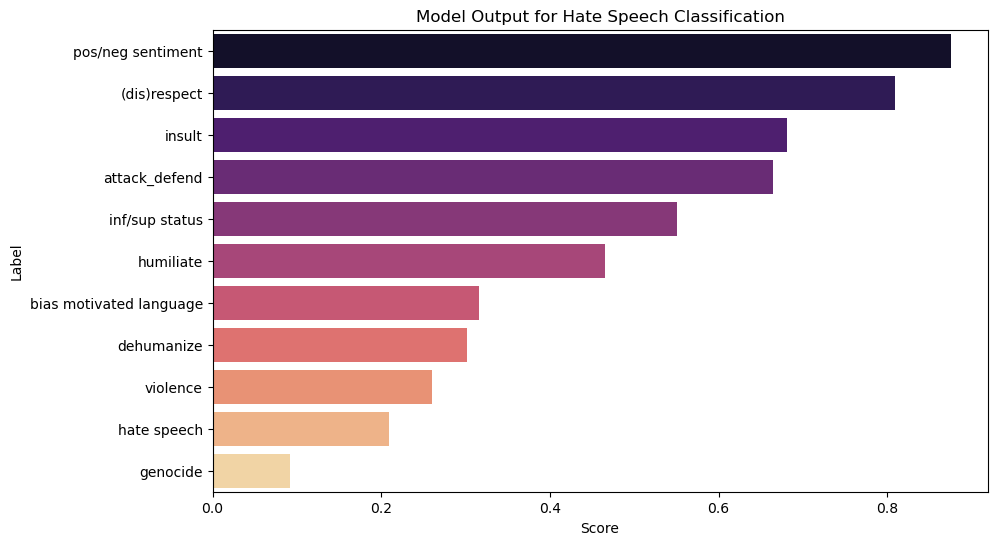

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example output from your model
output = [{'label': 'pos/neg sentiment', 'score': 0.875056803226471},
  {'label': '(dis)respect', 'score': 0.8088425397872925},
  {'label': 'insult', 'score': 0.6814374327659607},
  {'label': 'attack_defend', 'score': 0.6645259857177734},
  {'label': 'inf/sup status', 'score': 0.5505391955375671},
  {'label': 'humiliate', 'score': 0.46543481945991516},
  {'label': 'bias motivated language', 'score': 0.31636956334114075},
  {'label': 'dehumanize', 'score': 0.3020295202732086},
  {'label': 'violence', 'score': 0.26002922654151917},
  {'label': 'hate speech', 'score': 0.20921409130096436},
  {'label': 'genocide', 'score': 0.09173750877380371}]

# Convert output to DataFrame
import pandas as pd
df3 = pd.DataFrame(output)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='label', data=df3, palette='magma')
plt.title('Model Output for Hate Speech Classification')
plt.xlabel('Score')
plt.ylabel('Label')
plt.show()

In [35]:
hate_text3 = """
You're so cool. / It makes me hate you so much.
"""

hate_speech_multilabel_classifier(hate_text3)

[[{'label': 'pos/neg sentiment', 'score': 0.36184337735176086},
  {'label': '(dis)respect', 'score': 0.1522732824087143},
  {'label': 'insult', 'score': 0.09424799680709839},
  {'label': 'attack_defend', 'score': 0.08387334644794464},
  {'label': 'inf/sup status', 'score': 0.08276216685771942},
  {'label': 'humiliate', 'score': 0.055509552359580994},
  {'label': 'bias motivated language', 'score': 0.05517735332250595},
  {'label': 'dehumanize', 'score': 0.026231441646814346},
  {'label': 'violence', 'score': 0.0030061062425374985},
  {'label': 'genocide', 'score': 0.0013694154331460595},
  {'label': 'hate speech', 'score': 0.000209702062420547}]]

In [36]:
hate_text4 = """
Heal the world, make it a better place.
"""

hate_speech_multilabel_classifier(hate_text4)

[[{'label': 'pos/neg sentiment', 'score': 0.03974808752536774},
  {'label': 'inf/sup status', 'score': 0.030093036592006683},
  {'label': 'attack_defend', 'score': 0.02317453734576702},
  {'label': '(dis)respect', 'score': 0.022782817482948303},
  {'label': 'insult', 'score': 0.016380153596401215},
  {'label': 'humiliate', 'score': 0.010806621983647346},
  {'label': 'bias motivated language', 'score': 0.009086595848202705},
  {'label': 'dehumanize', 'score': 0.0061966534703969955},
  {'label': 'violence', 'score': 0.003624164266511798},
  {'label': 'genocide', 'score': 0.001496309181675315},
  {'label': 'hate speech', 'score': 8.744227670831606e-05}]]

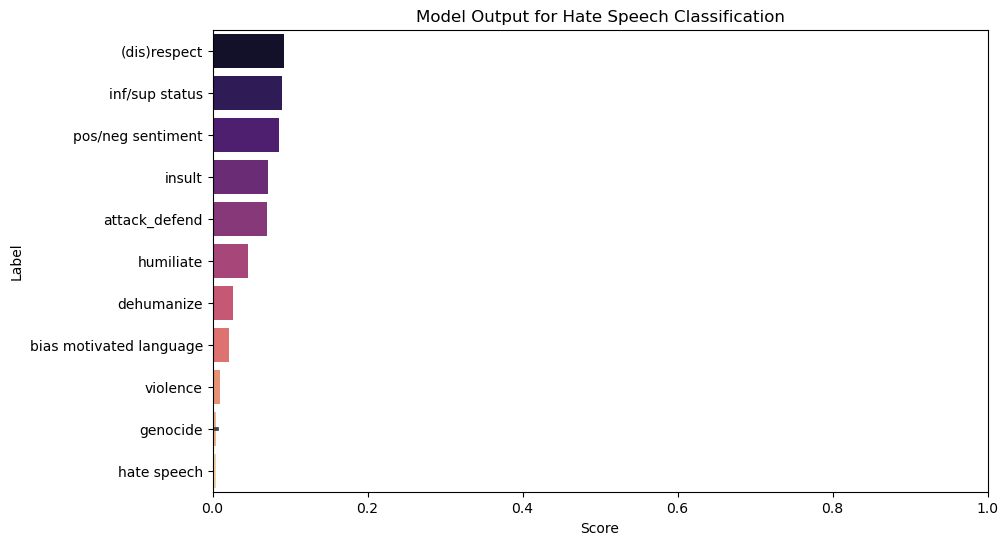

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example output from your model
output = [{'label': '(dis)respect', 'score': 0.09266536682844162},
  {'label': 'inf/sup status', 'score': 0.08926152437925339},
  {'label': 'pos/neg sentiment', 'score': 0.0851755142211914},
  {'label': 'insult', 'score': 0.07182870805263519},
  {'label': 'attack_defend', 'score': 0.07018497586250305},
  {'label': 'humiliate', 'score': 0.04568392410874367},
  {'label': 'dehumanize', 'score': 0.02685472182929516},
  {'label': 'bias motivated language', 'score': 0.020993337035179138},
  {'label': 'violence', 'score': 0.009552918374538422},
  {'label': 'genocide', 'score': 0.005137845873832703},
  {'label': 'hate speech', 'score': 0.0048912279307842255},
  {'label': 'genocide', 'score': 0.004430695436894894}]

# Convert output to DataFrame
import pandas as pd
df4 = pd.DataFrame(output)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='label', data=df4, palette='magma')
plt.title('Model Output for Hate Speech Classification')
plt.xlabel('Score')
plt.ylabel('Label')
plt.xlim(0, 1)
plt.show()

In [38]:
hate_text5 = """Slaying these hoes, gold trigger on the gun like
"""

hate_speech_multilabel_classifier(hate_text5)

[[{'label': 'hate speech', 'score': 0.9941017031669617},
  {'label': 'pos/neg sentiment', 'score': 0.9782177209854126},
  {'label': '(dis)respect', 'score': 0.9737583994865417},
  {'label': 'attack_defend', 'score': 0.9450051188468933},
  {'label': 'violence', 'score': 0.9383010268211365},
  {'label': 'insult', 'score': 0.9126899242401123},
  {'label': 'bias motivated language', 'score': 0.8211879134178162},
  {'label': 'genocide', 'score': 0.8058353066444397},
  {'label': 'inf/sup status', 'score': 0.7523627281188965},
  {'label': 'humiliate', 'score': 0.7482892274856567},
  {'label': 'dehumanize', 'score': 0.5819877982139587}]]

In [39]:
hate_text6 = """
Your people deserve to be massacred.
"""
# In English: You have to continue, without end, to the end. Together, in an ideal world, you and me

hate_speech_multilabel_classifier(hate_text6)

[[{'label': 'hate speech', 'score': 0.9992620348930359},
  {'label': 'pos/neg sentiment', 'score': 0.9950142502784729},
  {'label': '(dis)respect', 'score': 0.9932839870452881},
  {'label': 'attack_defend', 'score': 0.9924345016479492},
  {'label': 'insult', 'score': 0.967359721660614},
  {'label': 'violence', 'score': 0.9652652740478516},
  {'label': 'genocide', 'score': 0.9000707268714905},
  {'label': 'inf/sup status', 'score': 0.8661019802093506},
  {'label': 'humiliate', 'score': 0.8243361711502075},
  {'label': 'dehumanize', 'score': 0.6339882016181946},
  {'label': 'bias motivated language', 'score': 0.5384108424186707}]]

In [40]:
hate_text7 = """
Esa perra es tan fea
"""
# In english: That bitch is so ugly
 
hate_speech_multilabel_classifier(hate_text7)

[[{'label': 'pos/neg sentiment', 'score': 0.05039851740002632},
  {'label': 'bias motivated language', 'score': 0.040155909955501556},
  {'label': '(dis)respect', 'score': 0.037521179765462875},
  {'label': 'inf/sup status', 'score': 0.02650483511388302},
  {'label': 'insult', 'score': 0.022555073723196983},
  {'label': 'attack_defend', 'score': 0.02001245506107807},
  {'label': 'humiliate', 'score': 0.014992944896221161},
  {'label': 'dehumanize', 'score': 0.010551389306783676},
  {'label': 'violence', 'score': 0.004902948159724474},
  {'label': 'genocide', 'score': 0.0020583656150847673},
  {'label': 'hate speech', 'score': 0.00014498108066618443}]]

In [41]:
hate_text8 = """
我恨你
"""
# In english: I hate you
 
hate_speech_multilabel_classifier(hate_text8)

[[{'label': 'pos/neg sentiment', 'score': 0.2580184042453766},
  {'label': '(dis)respect', 'score': 0.20161858201026917},
  {'label': 'inf/sup status', 'score': 0.15790203213691711},
  {'label': 'insult', 'score': 0.14966854453086853},
  {'label': 'bias motivated language', 'score': 0.12848706543445587},
  {'label': 'humiliate', 'score': 0.12277733534574509},
  {'label': 'attack_defend', 'score': 0.09185228496789932},
  {'label': 'dehumanize', 'score': 0.08134263008832932},
  {'label': 'violence', 'score': 0.015439476817846298},
  {'label': 'genocide', 'score': 0.008619751781225204},
  {'label': 'hate speech', 'score': 0.0028018192388117313}]]

In [42]:
hate_text9 = """
"Handsome, you're a mansion with a view."
"""
 
hate_speech_multilabel_classifier(hate_text9)

[[{'label': '(dis)respect', 'score': 0.1991375833749771},
  {'label': 'pos/neg sentiment', 'score': 0.18525932729244232},
  {'label': 'insult', 'score': 0.13654756546020508},
  {'label': 'humiliate', 'score': 0.10385386645793915},
  {'label': 'inf/sup status', 'score': 0.1011524647474289},
  {'label': 'bias motivated language', 'score': 0.08464621007442474},
  {'label': 'dehumanize', 'score': 0.07468987256288528},
  {'label': 'attack_defend', 'score': 0.07381423562765121},
  {'label': 'violence', 'score': 0.009948458522558212},
  {'label': 'genocide', 'score': 0.002919798018410802},
  {'label': 'hate speech', 'score': 0.0012243720702826977}]]

In [45]:
hate_text10 = """
"You are a beautidul rose in the garden of god."
"""
 
hate_speech_multilabel_classifier(hate_text10)

[[{'label': '(dis)respect', 'score': 0.6042372584342957},
  {'label': 'insult', 'score': 0.49786481261253357},
  {'label': 'pos/neg sentiment', 'score': 0.4829689860343933},
  {'label': 'humiliate', 'score': 0.41675177216529846},
  {'label': 'dehumanize', 'score': 0.2818017601966858},
  {'label': 'inf/sup status', 'score': 0.2292042225599289},
  {'label': 'attack_defend', 'score': 0.22750453650951385},
  {'label': 'bias motivated language', 'score': 0.1962405890226364},
  {'label': 'hate speech', 'score': 0.017150728031992912},
  {'label': 'violence', 'score': 0.011135032400488853},
  {'label': 'genocide', 'score': 0.0022078456822782755}]]

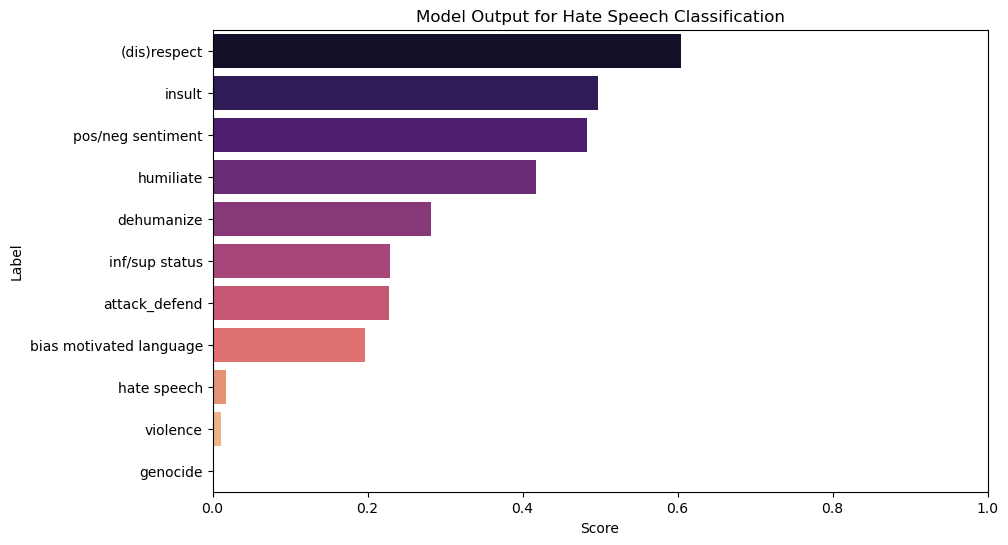

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example output from your model
output = [{'label': '(dis)respect', 'score': 0.6042372584342957},
  {'label': 'insult', 'score': 0.49786481261253357},
  {'label': 'pos/neg sentiment', 'score': 0.4829689860343933},
  {'label': 'humiliate', 'score': 0.41675177216529846},
  {'label': 'dehumanize', 'score': 0.2818017601966858},
  {'label': 'inf/sup status', 'score': 0.2292042225599289},
  {'label': 'attack_defend', 'score': 0.22750453650951385},
  {'label': 'bias motivated language', 'score': 0.1962405890226364},
  {'label': 'hate speech', 'score': 0.017150728031992912},
  {'label': 'violence', 'score': 0.011135032400488853},
  {'label': 'genocide', 'score': 0.0022078456822782755}]

# Convert output to DataFrame
import pandas as pd
df4 = pd.DataFrame(output)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='label', data=df4, palette='magma')
plt.title('Model Output for Hate Speech Classification')
plt.xlabel('Score')
plt.ylabel('Label')
plt.xlim(0, 1)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ngocle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


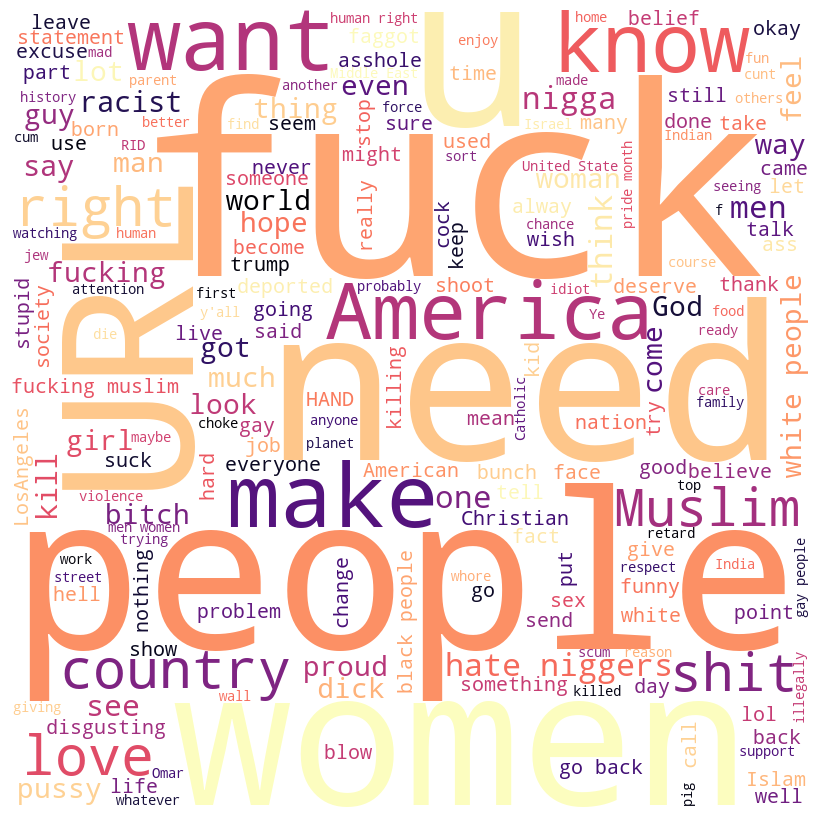

In [44]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download NLTK stop words (if not already downloaded)
nltk.download('stopwords')

# Combine NLTK stop words with WordCloud's STOPWORDS
combined_stopwords = set(STOPWORDS).union(set(stopwords.words('english')))

# Assuming df2['text'] contains your text data
combined_text = " ".join(text for text in df2['text'])

# Create the word cloud object with stop words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                colormap='magma',
                stopwords=combined_stopwords,  # Add stop words here
                min_font_size = 10).generate(combined_text)

# Display the generated image
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0) 

plt.show()


In [50]:
import pandas as pd
import re

# Provided text with training and validation metrics
text = """
EPOCH 1 | TRAIN LOSS: 0.36714 | VALIDATION LOSS: 0.34533 | VALIDATION ACCURACY: 0.84156 | VALIDATION F1: 0.59067
EPOCH 2 | TRAIN LOSS: 0.31827 | VALIDATION LOSS: 0.33391 | VALIDATION ACCURACY: 0.84890 | VALIDATION F1: 0.57763
EPOCH 3 | TRAIN LOSS: 0.28751 | VALIDATION LOSS: 0.33839 | VALIDATION ACCURACY: 0.84871 | VALIDATION F1: 0.57390
"""

# Regular expression pattern to extract metrics
pattern = r'EPOCH (\d+) \| TRAIN LOSS: ([\d.]+) \| VALIDATION LOSS: ([\d.]+) \| VALIDATION ACCURACY: ([\d.]+) \| VALIDATION F1: ([\d.]+)'

# Extracting data
data = re.findall(pattern, text)

# Creating DataFrame
df4 = pd.DataFrame(data, columns=['Epoch', 'Train Loss', 'Validation Loss', 'Validation Accuracy', 'Validation F1'])

# Converting numeric columns to float
numeric_cols = ['Train Loss', 'Validation Loss', 'Validation Accuracy', 'Validation F1']
df4[numeric_cols] = df4[numeric_cols].astype(float)

print(df4)


  Epoch  Train Loss  Validation Loss  Validation Accuracy  Validation F1
0     1     0.36714          0.34533              0.84156        0.59067
1     2     0.31827          0.33391              0.84890        0.57763
2     3     0.28751          0.33839              0.84871        0.57390


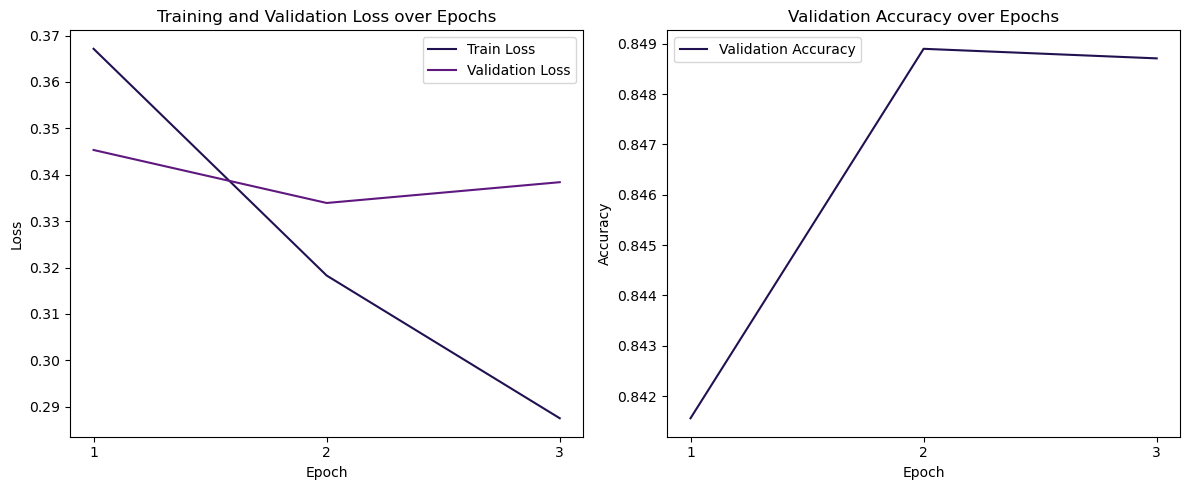

In [56]:
# Assuming df4 is your DataFrame with the correct column names
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("magma")

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
sns.lineplot(data=df4, x='Epoch', y='Train Loss', label='Train Loss')
sns.lineplot(data=df4, x='Epoch', y='Validation Loss', label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Validation Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(data=df4, x='Epoch', y='Validation Accuracy', label='Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
